<a href="https://colab.research.google.com/github/kavery11/DLlab/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

228813984/228813984 [==============================] - 1s 0us/step
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)        

Epoch 1/6
92/92 [==============================] - 23s 117ms/step - loss: 0.7180 - accuracy: 0.7769 - val_loss: 0.3796 - val_accuracy: 0.8569
Epoch 2/6
92/92 [==============================] - 8s 86ms/step - loss: 0.2740 - accuracy: 0.9060 - val_loss: 0.3907 - val_accuracy: 0.8638
Epoch 3/6
92/92 [==============================] - 9s 94ms/step - loss: 0.1632 - accuracy: 0.9418 - val_loss: 0.4737 - val_accuracy: 0.8365
Epoch 4/6
92/92 [==============================] - 9s 92ms/step - loss: 0.0893 - accuracy: 0.9721 - val_loss: 0.3908 - val_accuracy: 0.8624
Epoch 5/6
92/92 [==============================] - 8s 87ms/step - loss: 0.0546 - accuracy: 0.9860 - val_loss: 0.4457 - val_accuracy: 0.8719
Epoch 6/6
92/92 [==============================] - 9s 95ms/step - loss: 0.0328 - accuracy: 0.9935 - val_loss: 0.4058 - val_accuracy: 0.8706


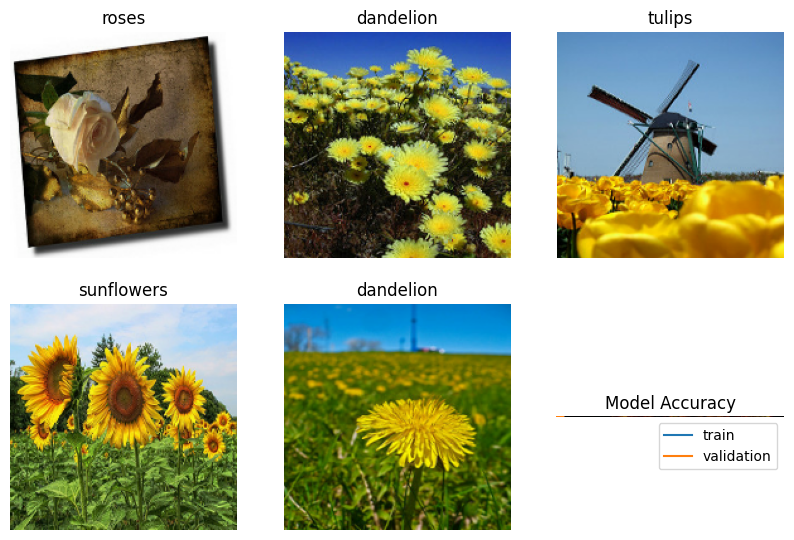

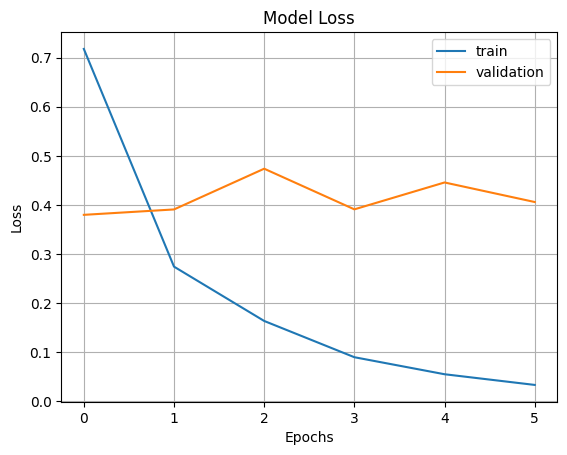

(1, 180, 180, 3)
1/1 [==============================] - 1s 1s/step
[[8.9390865e-05 2.5425509e-06 9.9841392e-01 5.0385562e-09 1.4942047e-03]]
The predicted class is roses


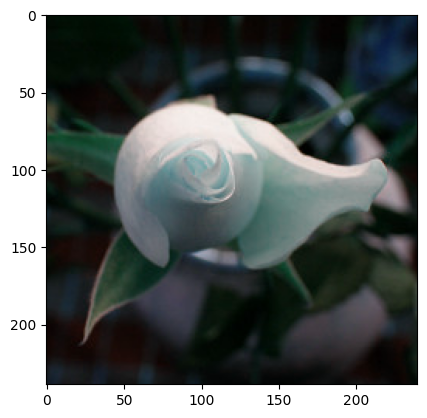

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

print(data_dir)

roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

epochs=6
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

import cv2
image=cv2.imread(str(roses[100]))

plt.imshow(image)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

pred=resnet_model.predict(image)
print(pred)

output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)